# ECON408: Computational Methods in Macroeconomics

Optimal Consumption, Savings, and the Permanent Income Model

Jesse Perla (University of British Columbia)

# Overview

## Motivation

-   Previously, the savings rate has been an exogenously given function
    of income
-   In this section we will analyze optimal consumption and savings
    decisions in a simple model: the classic permanent income model of
    Milton Friedman and refined by Hall (1978)
    -   Given these decision processes, we could embed them into our
        previous models of income dynamics

## Exogenous vs. Endogenous Savings

-   Why do we need to bother with a model of savings and consumption?
    Couldn’t we just estimate it from the data use it empirically?
-   The challenge is that this only leads to a limited number of
    counterfactuals
    -   For example, we can simulate a panel of agents living in a fixed
        economy spanned by the data
-   But what about numerical experiments where the environment changes??
    -   A tax cut when future taxes balance budget
    -   Wouldn’t the savings rate change in response to these plans?
-   This led early macro-economists to consider that the Marginal
    Propensity to Consume (MPC) might adjust based on information sets
    alone

## Materials

-   Adapted from QuantEcon lectures coauthored with John Stachurski and
    Thomas J. Sargent
    -   [Optimal Savings I: The Permanent Income
        Model](https://julia.quantecon.org/dynamic_programming/perm_income.html)
        -   Note using $F_t = -b_t$. i.e., financial assets rather than
            debt

In [1]:
using Distributions, Plots, LaTeXStrings, LinearAlgebra, Statistics
using Plots.PlotMeasures, QuantEcon, StatsPlots
default(;legendfontsize=16, linewidth=2, tickfontsize=12,
         bottom_margin=15mm)

# Preferences

## Welfare and Preferences

-   To introduce an endogenous choice, consider how an agent would
    compare alternative bundles of consumption goods. Assume agent:

    -   Lives for $t=0,\ldots \infty$ (see [our first
        lectures](https://jlperla.github.io/ECON408/lectures/geometric_series_fixed_points.html#/is-infinite-horizon-a-reasonable-approximation)
        importance)
    -   Gains period utility $u(c_t)$ from consumption $c_t$. Previously
        we assumed this was linear
    -   Discounts future $u(c_t)$ with discount factor $\beta \in (0,1)$

-   This leads to preferences that are additively separable and they
    compare $\{c_t\}_{t=0}^\infty$ streams of consumption at time $t$

    $$
    \sum_{j=0}^\infty \beta^j u(c_{t+j})
    $$

## Period Utility

-   Previously we had assumed a linear utility function (which we called
    “risk neutral”)
-   Consider utility which is strictly concave where:
    -   $u'(c) > 0$: More is better
    -   $u''(c) < 0$: Diminishing Marginal Utility
    -   $\lim_{c \to 0} u'(c) = \infty$: Infinite Marginal Utility at
        zero
-   Examples include
    -   $u(c) = \log(c)$ and $u(c) = \frac{c^{1-\gamma}}{1-\gamma}$ for
        $\gamma > 0$
    -   $u(c) = \frac{a_2}{2}c^2 + a_1 c + a_0$ for $a_2 < 0$ as long as
        $c$ is less than the “satiation point” where $u'(c) = 0$

## Strictly Concave Utility

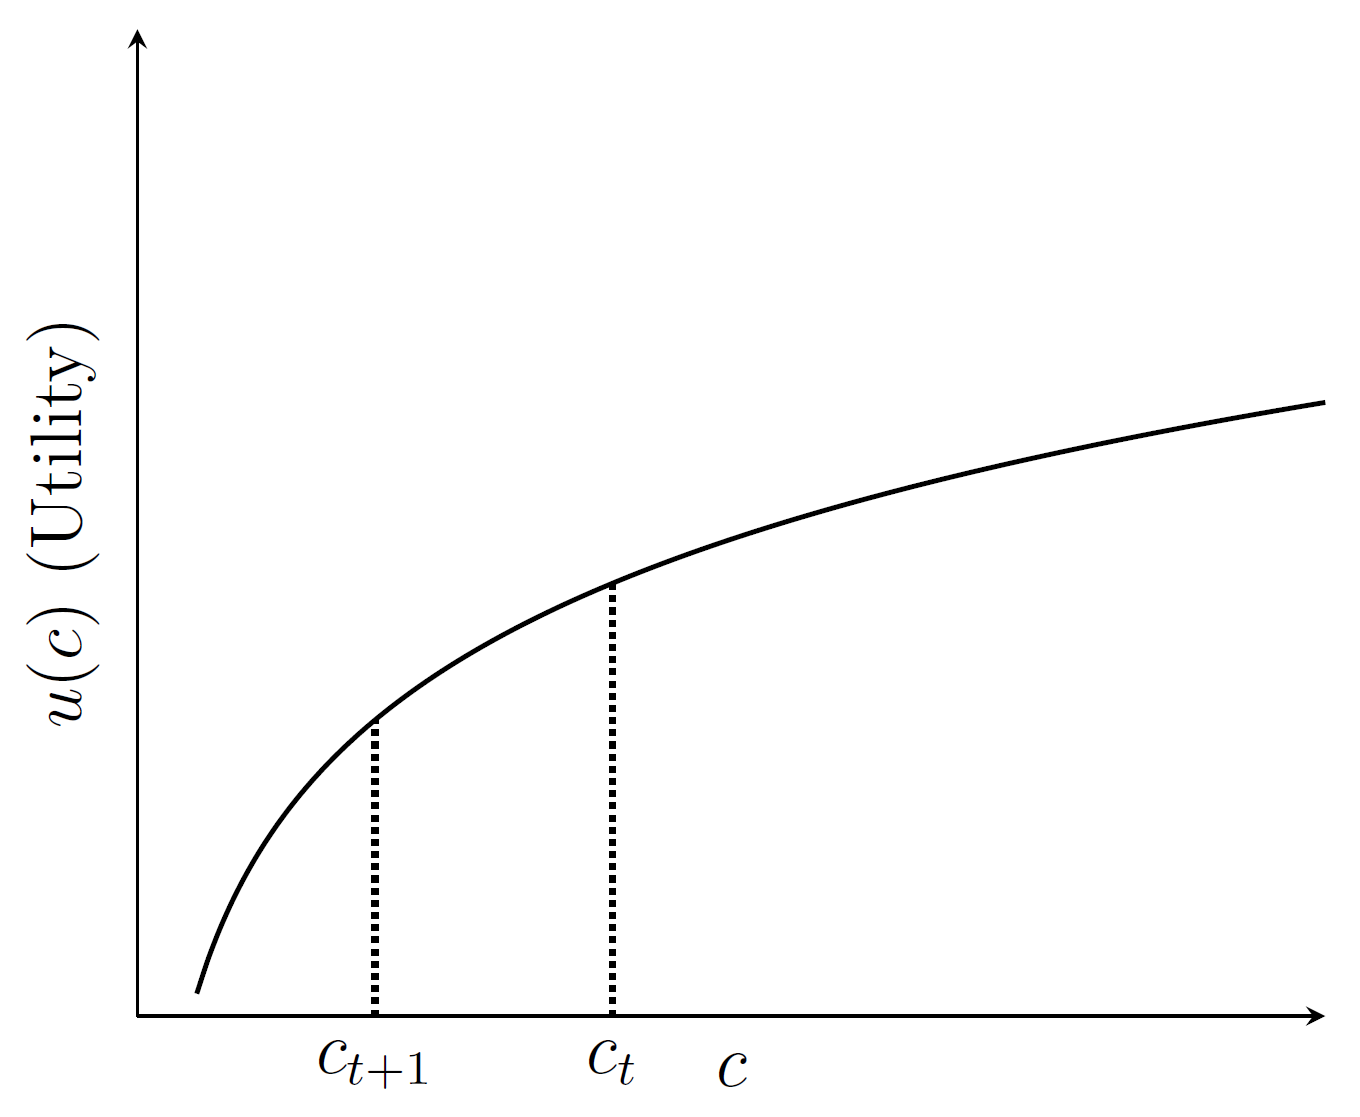

-   Positive Marginal Utility of Consumption
-   Diminishing Returns
-   No (visible, at least) point of satiation

## Uncertainty

-   What if the agent does not know $\{c_t\}_{t=0}^\infty$ because it is
    random or uncertain?

-   In that case, we can instead have the agent compare expected utility
    streams

    $$
    \mathbb{E}_t\left[\sum_{j=0}^\infty \beta^j u(c_{t+j})\right]
    $$

    -   Where $\mathbb{E}_t[\cdot] \equiv \mathbb{E}[\cdot|I_t]$ with
        $I_t$ the information set we make available at time $t$ for
        forecasting in our model
    -   This uses our model of expectation formation from the [previous
        lecture](https://jlperla.github.io/ECON408/lectures/linear_state_space_models.html#/models-of-expectations)

## Risk Aversion vs. Inter-temporal Substitution

-   If $u(c)$ is strictly concave the agent:
    -   **Risk Averse:** Prefers more deterministic consumption to those
        with a higher variance
    -   **Preferences for Consumption Smoothing:** Will substitute
        between time periods rather than smoother consumption over time
        rather than large fluctuations
-   One challenge in macroeconomics with these preferences is that the
    $u(c)$ serves both purposes, which have different economic
    interpretations.
    -   To disentangle, can use recursive preferences such as
        [Epstein-Zin](https://en.wikipedia.org/wiki/Epstein%E2%80%93Zin_preferences)
        which decouple these two concepts

## Smoothing Incentives

-   Consider a simpler case where they live for two periods and don’t
    discount the future: $V(c_1, c_2) \equiv u(c_1) + u(c_2)$
-   Consider two possible bundles: $\{c_t, c_{t+1}\}$ and
    $\{\bar{c}, \bar{c}\}$ where $c_t + c_{t+1} = 2 \bar{c}$
-   If the agent is risk-neutral, we see that
    $V(c_t, c_{t+1}) = V(\bar{c}, \bar{c})$
-   However, if the agent if risk-averse, then $$
    V(c_t, c_{t+1}) < V(\bar{c}, \bar{c})\quad \text{unless }c_t = c_{t+1} = \bar{c}
    $$
    -   They strictly prefer smoother consumption over time
    -   i.e., would forgo consumption on average to gain smoother
        consumption

## Smoothing and Concavity

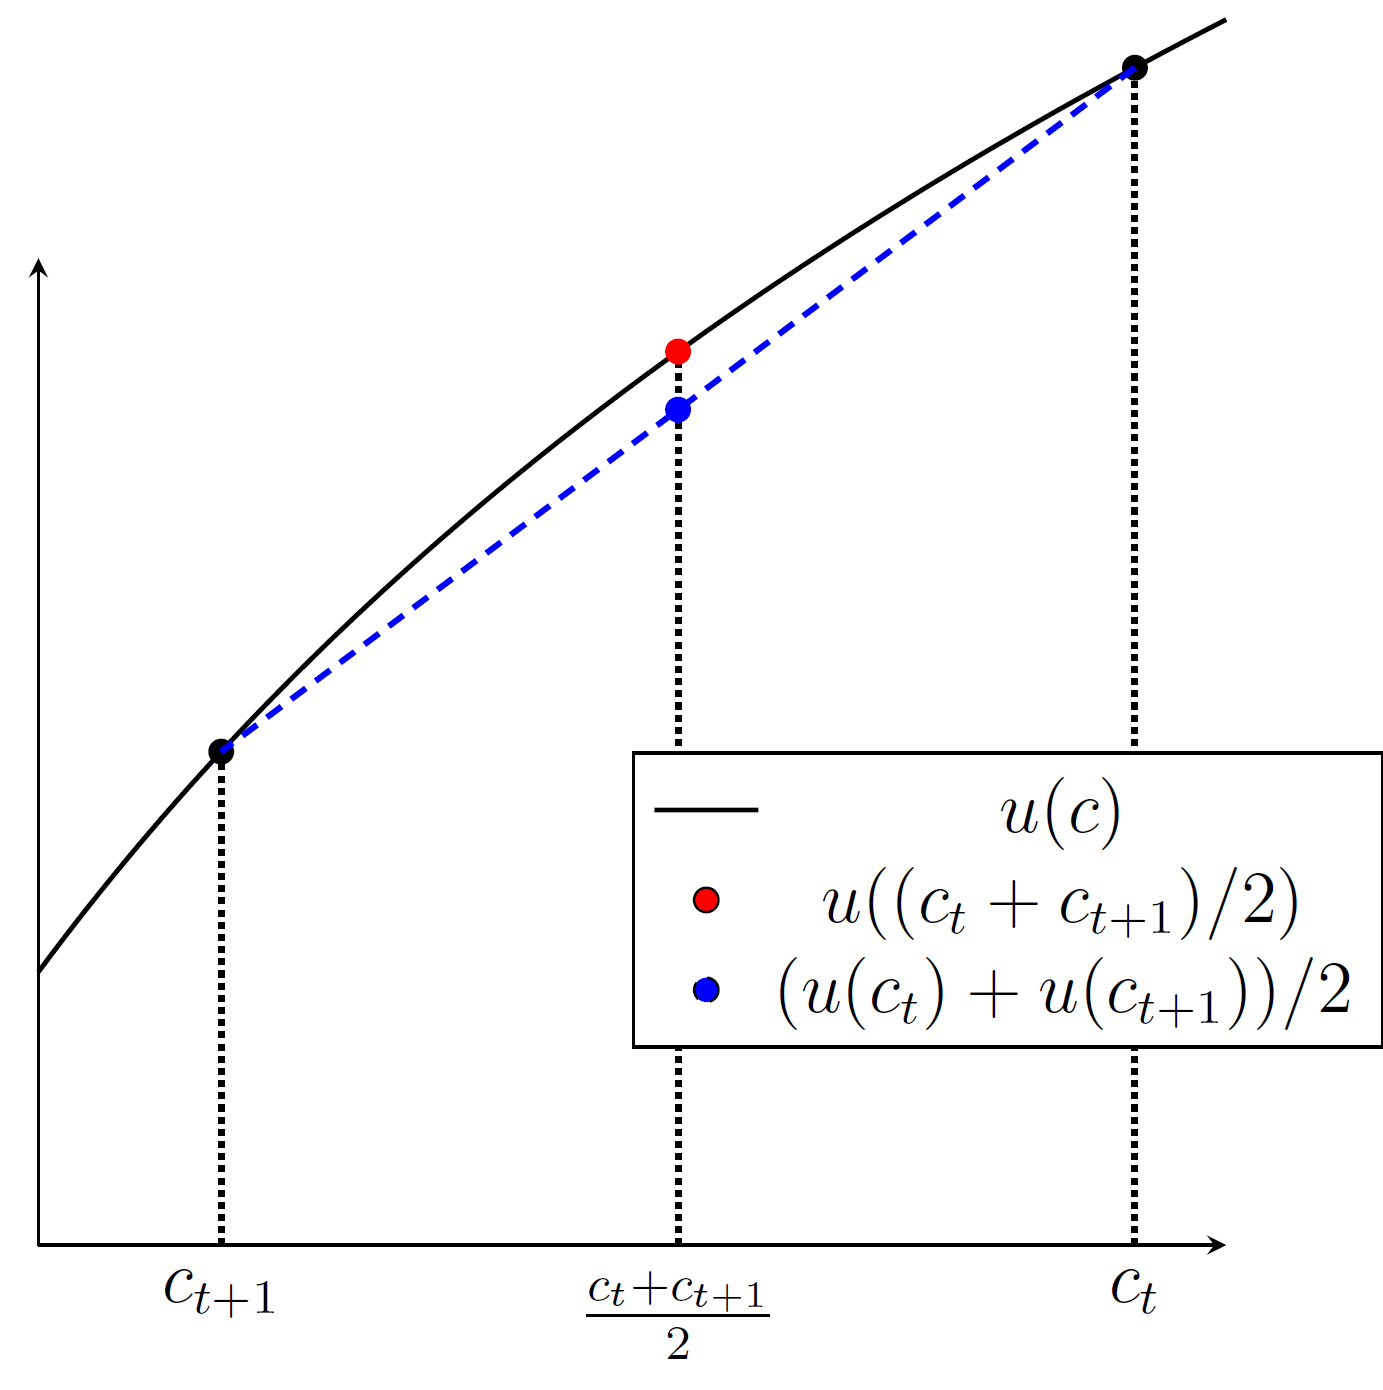

-   Recall $\bar{c} \equiv (c_t + c_{t+1})/2$
-   2 periods, $\beta = 1$
-   Same “price” for $c_t$ and $c_{t+1}$
-   Two possible bundles:
    1.  $\{c_t, c_{t+1}\}$
    2.  $\{\bar{c}, \bar{c}\}$
-   Later, $\beta$ and prices will simply distort this exact tradeoff

## Risk-Aversion Intuition

-   Consider a utility $u(c)$ and a lottery which is a random variable

    -   $C = \begin{cases} c_L & \text{with probability } \frac{1}{2} \\ c_H & \text{with probability } \frac{1}{2} \end{cases}$
    -   Let $(c_L + c_H)/2 = \bar{c}$
    -   We can form expected utility as
        $\mathbb{E}[u(C)] = \alpha u(c_L) + (1-\alpha) u(c_H)$

-   Note if risk-neutral then
    $\mathbb{E}[C] = \frac{1}{2} c_L + \frac{1}{2}c_H = \bar{c} = u(\bar{c})$

-   Then if an agent is risk-averse, $$
    u(\mathbb{E}(C)) > \mathbb{E}[u(C)]
    $$

    -   i.e., would forgo consumption on average to avoid the risk

## Risk Aversion and Concavity

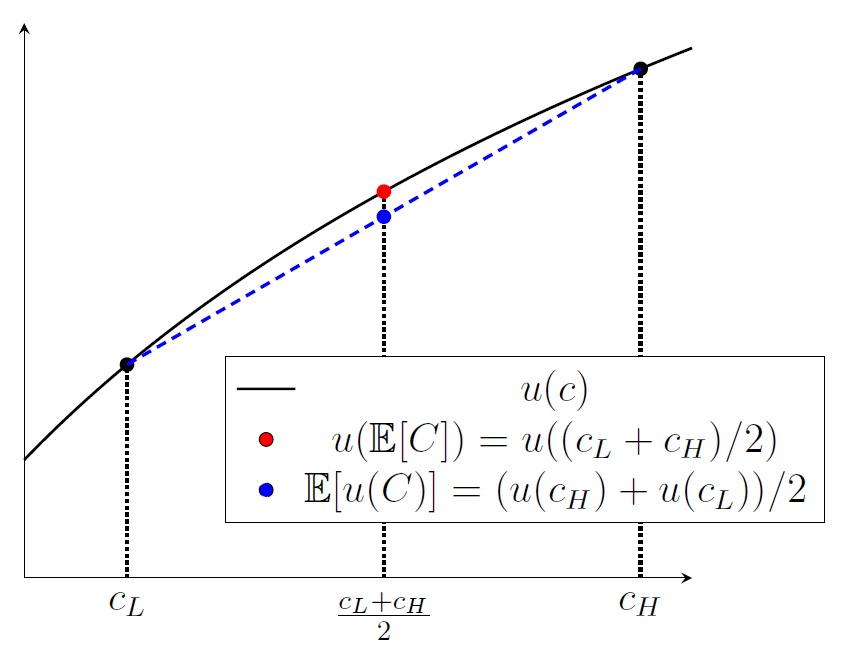

-   Interpretation as fair, risk-neutral prices for lotteries
-   Then compare choice between lotteries:
    1.  $\mathbb{E}[u(C)] \equiv \frac{1}{2} u(c_L) + \frac{1}{2} u(c_2)$
    2.  $u(\mathbb{E}(C)) = u(\frac{1}{2} c_L + \frac{1}{2} c_H)$
-   The strict concavity of $u(c)$ shows you are better off with the
    deterministic consumption

# The Decision Problem

## Permanent Income Model

-   The classic permanent income model explored the impact of these
    economic forces on consumption and savings decisions. The agent
    -   has an exogenous, potentially stochastic, income stream
        $\{y_t\}_{t=0}^\infty$
    -   chooses a consumption policy $\{c_t\}_{t=0}^\infty$ to maximize
        expected utility
    -   forecasts the random variables $\{c_t\}_{t=0}^\infty$ and
        $\{y_t\}_{t=0}^\infty$ streams using mathematical expectations
    -   has access to a risk-free bond market with interest rate $R$ to
        either save or borrow, enabling them to smooth consumption over
        time or deal with uncertainty
    -   has financial assets at time $t$ be $F_t$ which also must be
        forecast

## Period-By-Period Budgets

-   Given income $y_t$, consumption $c_t$, and financial assets $F_t$,
    the agent’s budget constraint is $$
    F_{t+1} = R(F_t + \underbrace{y_t - c_t}_{\text{savings}})
    $$
    -   where $R > 1$ is the **gross interest rate** on saving or
        borrowing, and $1 + r \equiv R$ would be the **net interest
        rate**
    -   the interpretation is simple: take their bank account value
        (positive or negative), add or subtract savings that period, and
        then they gain interest on the new balance (or the the debt
        grows if negative)
-   If this was the only constraint, you might have infinite borrowing
    each period

## Lifetime Budget Constraint (LBC)

-   Alternatively, if all of those accounting relationships must hold,
    substitute to form a single budget

-   Given forecasts of $c_{t+j}$ and $y_{t+j}$, the budget must fulfill

    $$
    \underbrace{\mathbb{E}_t\left[\sum_{j=0}^{\infty}\frac{c_{t+j}}{R^j}\right]}_{\text{EPDV of consumption}} = \underbrace{\mathbb{E}_t\left[\sum_{j=0}^{\infty} \frac{y_{t+j}}{R^j}\right]}_{\text{EPDV of income}} + F_t
    $$

-   The $F_t$ is the current financial assets. Consider leaving in bank
    to pay for $c_{t+j}$

    -   Then $R^{-j}$ enters because $\$1$ today grows to
        $\$1 \times R^j$ in $j$ periods
    -   That allows you to buy $1 \times R^{-j}$ units of $c_{t+j}$

## A Special Case of $R = 1/\beta$

-   Where does $R$ come from? The decisions of other agents in the
    economy
    -   Lenders are asked to give up 1 unit of consumption today for $R$
        units of consumption tomorrow
    -   Hence the $R$ should reflect the degree of impatience of the
        lender
-   An important case is when $\beta R = 1$
    -   As we will discuss later, this will arise in **equilibrium** as
        the natural rate of interest when agent’s can smooth consumption
        fully
-   The intuition is that the gross interest rate exactly offsets the
    impatience, as captured by the discount factor. Risk, etc. will
    enter later

## Lifetime Budget Constraint when $\beta R = 1$

-   In that case, we see that the budget constraint simplifies to

    $$
    \underbrace{\mathbb{E}_t\left[\sum_{j=0}^{\infty}\beta^j c_{t+j}\right]}_{\text{EPDV of consumption}} = \underbrace{\mathbb{E}_t\left[\sum_{j=0}^{\infty} \beta^j y_{t+j}\right]}_{\text{EPDV of income}} + F_t
    $$

    -   This should give you hope on tractability: if $c_{t+j}$ and
        $y_{t+j}$ follow simple stochastic processes (e.g., the LSS)
        then we can can calculate these EPDV

## Decision Problem

-   Economists (usually) formalize decisions as optimization problems
-   Taking an exogenous gross interest rate $R > 1$, initial conditions
    $\{y_t, F_t\}$

$$
\begin{aligned}
\max_{\{c_{t+j}, F_{t+j}\}_{j=0}^\infty} & \mathbb{E}_t\left[\sum_{j=0}^\infty \beta^j u(c_{t+j})\right] \\
\text{s.t.} \,& F_{t+j+1} = R(F_{t+j} + y_{t+j} - c_{t+j})\,\quad \text{ for all } j \geq 0\\
& \text{no-ponzi scheme/transversality condition}
\end{aligned}
$$

-   No-ponzi condition treated informally: prevents the agent from
    borrowing too quickly, equivalent to not dying in debt if they had a
    finite life

## Decision Problem (Alternative)

-   While we cannot in extensions with borrowing constraints, etc., here
    we can use the LBC

    $$
    \begin{aligned}
    \max_{\{c_{t+j}\}_{j=0}^\infty} & \mathbb{E}_t\left[\sum_{j=0}^\infty \beta^j u(c_{t+j})\right] \\
    \text{s.t.} \,&  \mathbb{E}_t\left[\sum_{j=0}^{\infty}R^{-j} (c_{t+j}-y_{t+j})\right] = F_t
    \end{aligned}
    $$

    -   rearranged to show that the EPDV of savings = initial financial
        assets. Implicitly uses the no-ponzi scheme condition

## Consumption Plans, Information Sets, and Forecasts

-   $c_{t+j}$ and $F_{t+j+1}$ are random variables for all $j > 0$
-   The agent is making a consumption plan for each realization of the
    random shocks
    -   Without proof, with these preferences the plan is
        **time-consistent**: they will not want to change their plan,
        even after seeing $y_{t+j}$ for $j > 0$
-   To forecast the future, they are conditioning on their own decisions
    given the randomness inherent to the $y_{t+j}$ process
    -   Formally modeling information to use $\mathbb{E}_t[\cdot]$
-   This seems like an intractable problem?

## First-Order Conditions

-   Without a full derivation, can show that the solution to this
    problem exists, for strictly concave $u(c)$ where, given a $F_0$
    initial condition

    $$
    \begin{aligned}
    u'(c_t) &= \beta R\, \mathbb{E}_t[u'(c_{t+1})],\quad \text{ Euler equation} \\
    F_{t+1} &= R(F_t + y_t - c_t),\quad \text{ Budget Constraint}\\
    0 &= \mathbb{E}_0\left[\lim_{j \to \infty} \beta^j F_{t+j}\right],\quad \text{ No-Ponzi Scheme}
    \end{aligned}
    $$

    -   Or, equivalently in this case, the LBC must also hold
    -   Note that we have switched from the $t+j$ to just $t$ for
        current period

-   Still challenging since we need to forecast optimal $c_{t+1}$

## Motivating Derivation of the Euler Equation

-   See
    [here](https://github.com/jlperla/ECON307/blob/main_2024/lectures/permanent_income.pdf)
    for a more complete derivation in the deterministic case
-   Will derive Euler Equation for the simple case of 2-periods $t$ and
    $t+1$, which ends up nesting the general case
-   Budget $F_{t+1} = R(F_t + y_t - c_t)$ but assume $F_{t+2} = 0$ since
    they “die”
    -   Then $c_{t+1} = y_{t+1} + F_{t+1}$

    $$
    c_{t+1} = y_{t+1} + R(F_t + y_t - c_t)
    $$

## Decision Problem with 2 Periods

$$
\begin{aligned}
\max_{c_t} & \left[u(c_t) + \beta \mathbb{E}_t[u(c_{t+1})]\right]\\
\text{s.t.} \,& c_{t+1} = y_{t+1} + R(F_t + y_t - c_t)\\
\max_{c_t}  & \left[u(c_t) + \beta \mathbb{E}_t[u(y_{t+1} + R(F_t + y_t - c_t))]\right]
\end{aligned}
$$ - Take the FONC, which can be rearranged to the Euler equation

$$
  \begin{aligned}
  0 &= u'(c_t) - \beta R \mathbb{E}_t[u'(y_{t+1} + R(F_t + y_t - c_t))]\\
  u'(c_t) &= \beta R \mathbb{E}_t[u'(c_{t+1})]
  \end{aligned}
  $$

## Interpreting the Euler Equation

-   Euler Equations are ubiquitous intertemporal optimality conditions

    $$
    u'(c_t) = \beta R\, \mathbb{E}_t[u'(c_{t+1})]
    $$

-   Tradeoff of consuming less today is the marginal utility today

-   The right-hand term is the benefit

    -   You gain the marginal utility (MU) of consuming a little more
        tomorrow
    -   Need to forecast MU tomorrow, considering risk
        aversion/smoothing
    -   A unit of utility tomorrow is only worth $\beta$ times that of
        today
    -   However, you are compensated by the savings growing at interest
        rate $R$ which increases the amount of units of consumption you
        can afford

# Special Case of Deterministic Income

## Special case of Deterministic Income and $\beta R = 1$

-   If $y_t$ is deterministic, then this problem no longer requires
    forcasts

-   Furthermore, assume $\beta R = 1$ (i.e. interest exactly offsets
    impatience)

    $$
    u'(c_t) = u'(c_{t+1})
    $$

-   Moreover, given assumptions that $u'(c) > 0$ and $u''(c) < 0$, this
    implies that $c_t = c_{t+1}$

-   This is the classic Permanent Income Result

## Reminder: Strictly Concave Utility

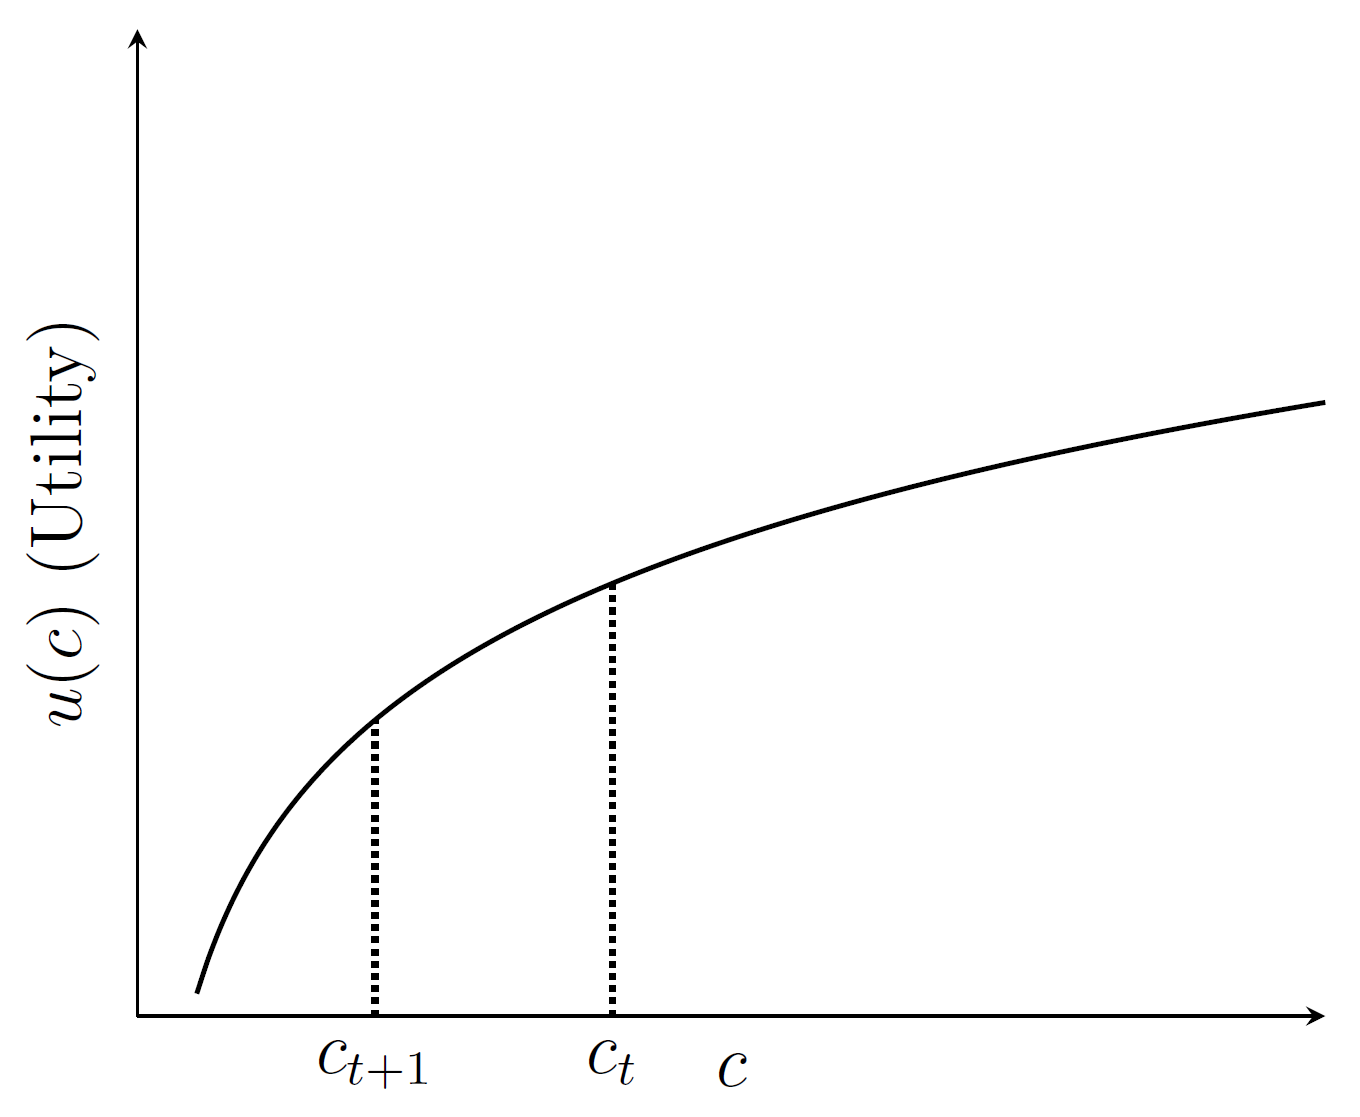

-   Positive Marginal Utility of Consumption
-   Diminishing Returns
-   No (visible, at least) point of satiation

## Marginal Utility

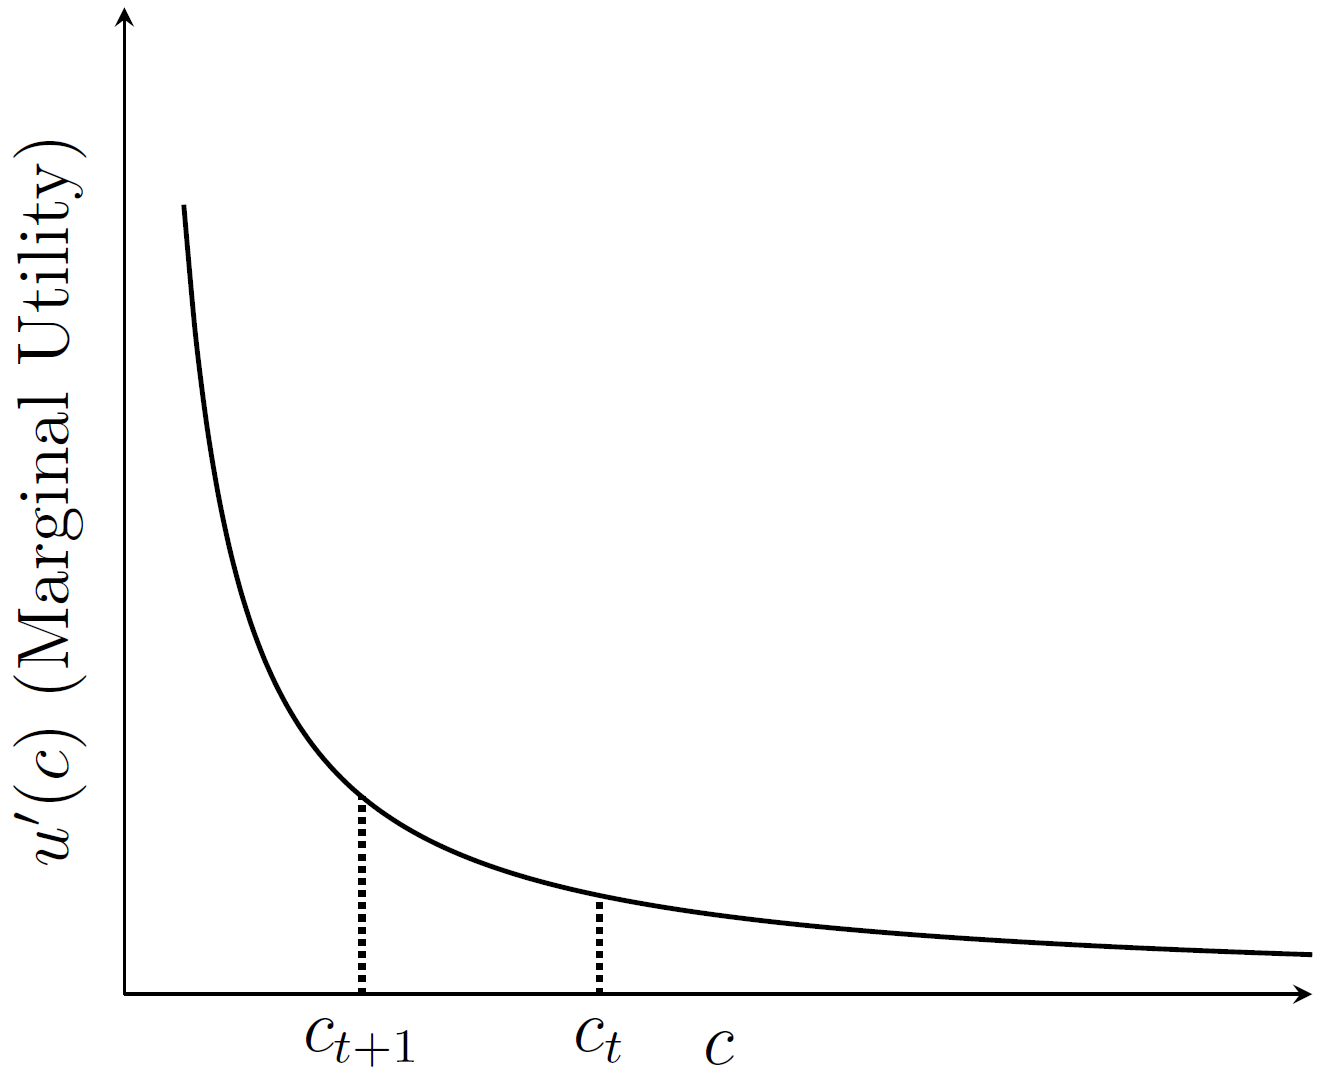

-   $u'(c) > 0$ but decreasing $u''(c) < 0$
-   $u'(c_1) = u'(c_2)\implies c_1 = c_2$
-   If $u'(c_t) < u'(c_{t+1})$ then $c_t > c_{t+1}$
-   The less they consume, the more valuable additional consumption in
    that period would be

## Equating Marginal Utilities

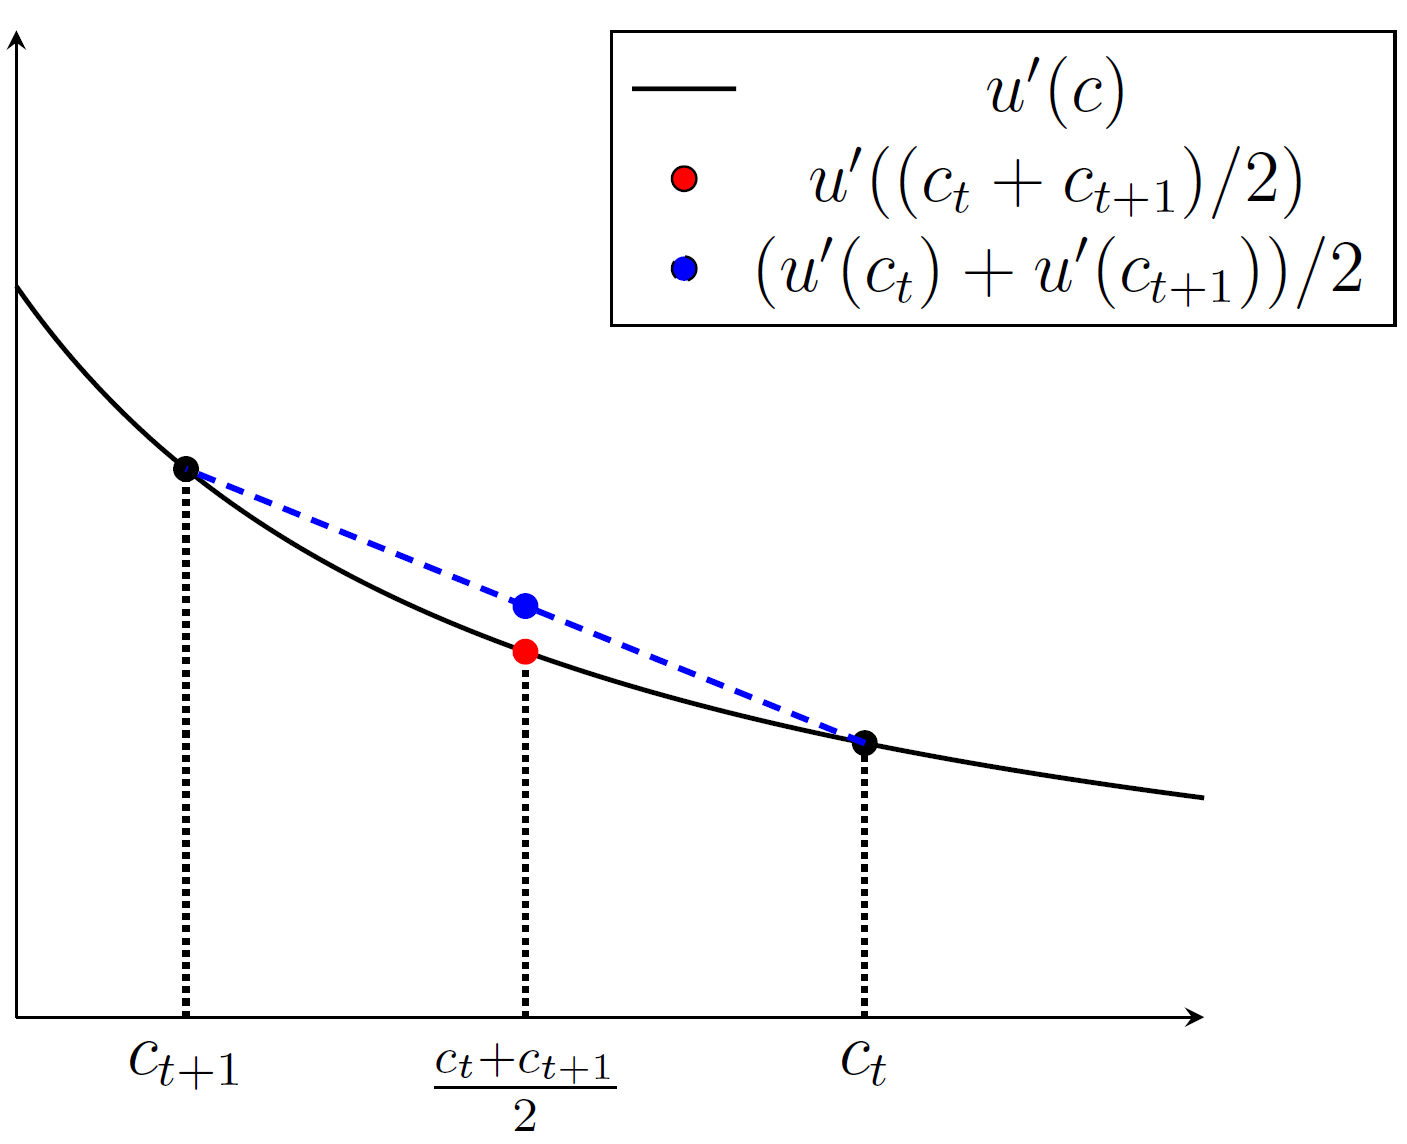

-   Euler here: $u'(c_t) = u'(c_{t+1})$ for all $t$
-   Exact for simple deterministic, $\beta R = 1$ case
-   By equating marginal utilities at all points, they gain a lower
    average marginal utility

## Smoothing and Welfare

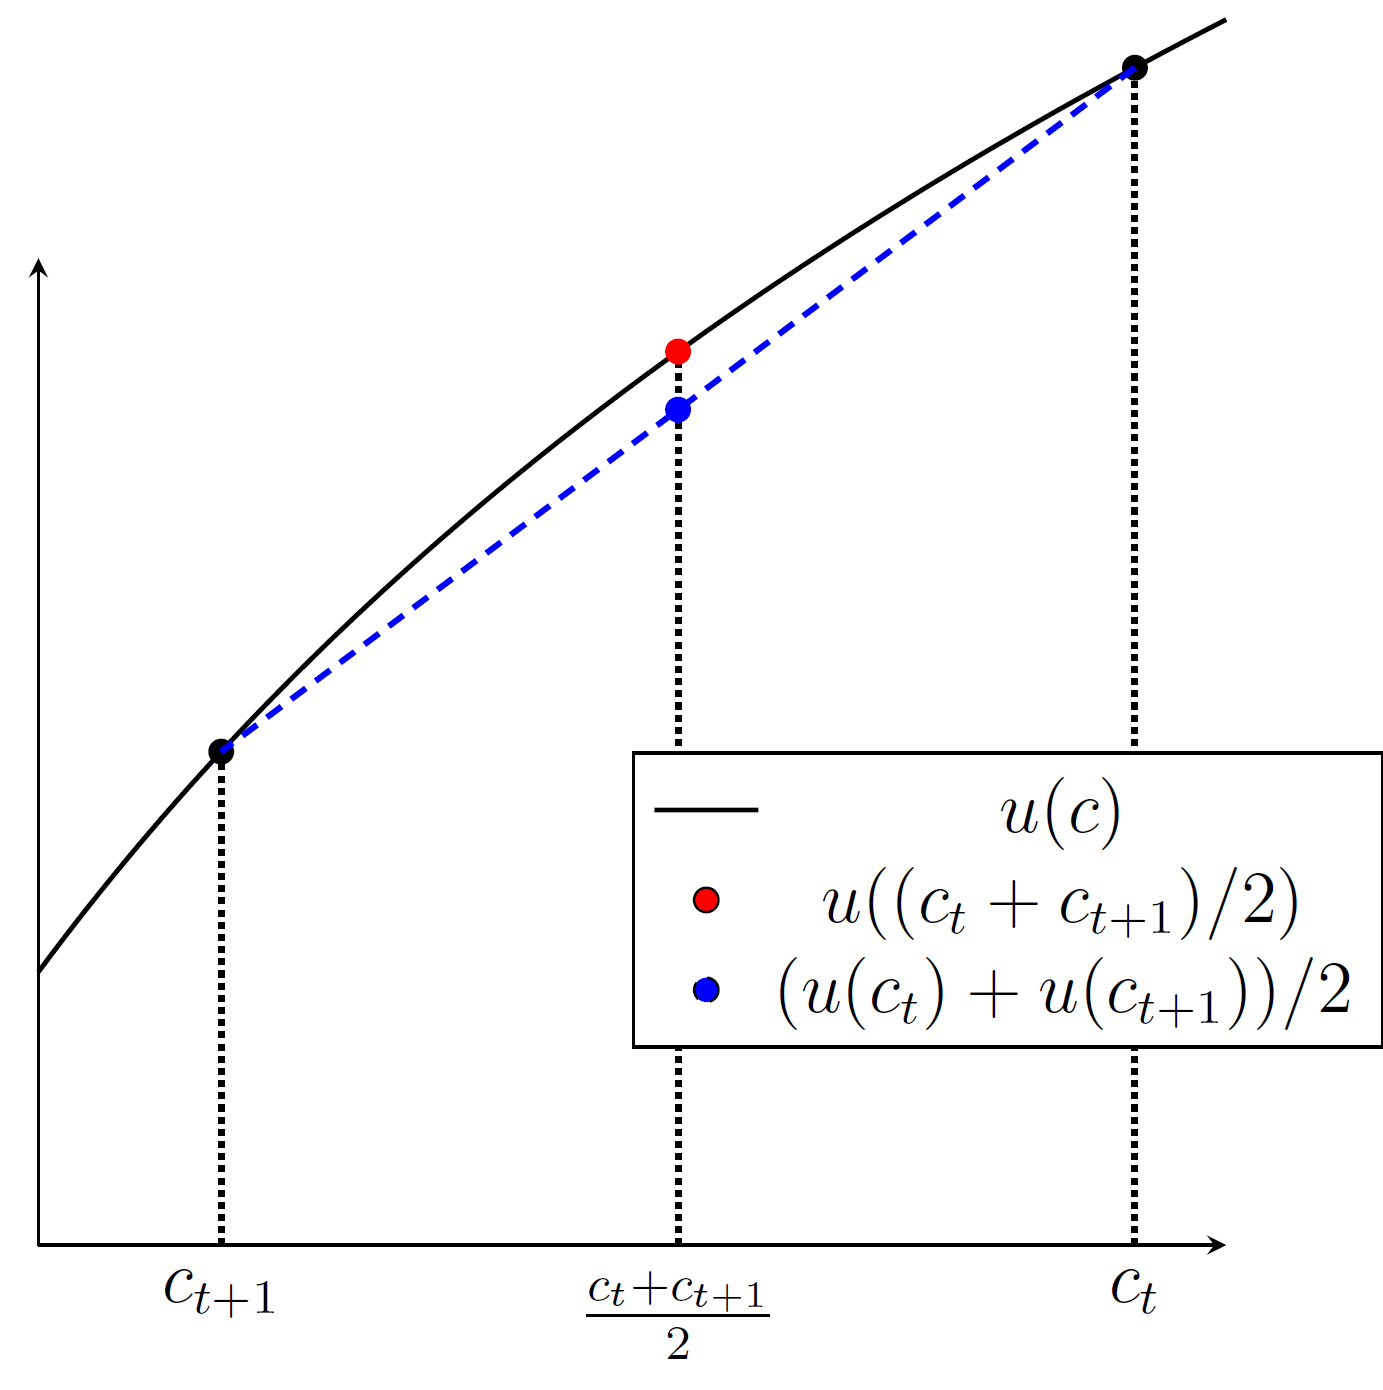

-   The higher average marginal utility for the volatile consumption
    path corresponds to a lower average utility
    -   i.e. welfare here
-   If “risk-neutral”, then the agent is indifferent between the two
    paths
    -   We see that since the utility function would be linear itself

## Permanent Income Result for Strictly Concave $u(c)$

-   With $\beta R = 1$, use $c_t = \bar{c}$ with the LBC $$
    \begin{aligned}
    \sum_{j=0}^{\infty}\beta^j c_{t+j} &= \sum_{j=0}^{\infty}\beta^j y_{t+j} + F_t\\
    \bar{c} \sum_{j=0}^{\infty}\beta^j &= \sum_{j=0}^{\infty}\beta^j y_{t+j} + F_t\\
    c_t = \bar{c} &= \underbrace{(1-\beta)}_{\text{MPC}}\bigg[\underbrace{\sum_{j=0}^{\infty}\beta^j y_{t+j}}_{\text{Human Wealth}} + F_t\bigg]
    \end{aligned}
    $$

    -   The consumer has a constant MPC out of **total wealth**

# Stochastic Income and Consumption

## What about Stochastic Income?

-   Leaving $\beta R = 1$ for the remainder of the slides

-   Optimality: agents would **LOVE** to equate all marginal utilities

    $$
    u'(c_t) = \mathbb{E}_t[u'(c_{t+1})]
    $$

    -   Will do the best they can given information sets

-   With enough financial instruments to hedge all risks, they might!

    -   However, for an arbitrary $u(c)$ function this is hard to
        achieve in our environment, where they only have a single,
        risk-free asset

## Quadratic Utility

-   A special case of these preferences is
    $u(c) = \frac{a_2}{2} c^2 + a_1 c + a_0$ for $a_2 < 0$
    -   This is a **quadratic utility function**
    -   If $a_2 < 0$ this is strictly concave
    -   However, $u'(c) = a_2 c + a_1$ is always negative for large
        enough $c$
        -   i.e, satiation point for the $c_{\max}$ where
            $u'(c_{\max}) = 0$
-   Assume conditions such that $c_t \ll c_{\max}$, and this is strictly
    concave in the relevant range

## Euler Equation for Quadratic Utility

-   Since $u'(c) = a_2 c + a_1$ we can write the euler equation as

    $$
    \begin{aligned}
    u'(c_t) &= \mathbb{E}_t[u'(c_{t+1})]\\
    a_2 c_t + a_1 &= \mathbb{E}_t[a_2 c_{t+1} + a_1]\\
    c_t &= \mathbb{E}_t[c_{t+1}]
    \end{aligned}
    $$

    -   That is, the agent will choose consumption so that the
        **expected value** of consumption next period is equal to the
        current period

-   With more general strictly concave preferences, often:
    $c_t \approx \mathbb{E}_t[c_{t+1}]$

## Recall: Martingales

-   Reminder: $X_t$ is a martingale if $\mathbb{E}_t[X_{t+1}] = X_t$
-   In other words, **consumption is a
    [martingale](https://jlperla.github.io/ECON408/lectures/linear_state_space_models.html#/martingales)**
    for any $y_t$ stochastic process!
-   Key feature of martingales: the history has **no predictive power**
    for the future
-   This will also come up in macro-finance and asset pricing later
    -   i.e., if the past had systematic and consistent predictive
        power, then there would be systematic and consistent profits to
        be made
    -   If there were systematic profits to be made, wouldn’t prices
        adjust as people tried to make those profits?

## Consumption is a Martingale

-   Similar logic: Consumers use all available information to smooth
    consumption
-   With the financial assets we give them, a martingale is the closest
    they can get to fully smoothed consumption
-   The agent will look at their permanent income (i.e. EPDV of human
    wealth + financial assets) and plan to keep it constant on average
-   This highlights that the changes in consumption come from “surprise”
    -   If any of that surprise was in their [information
        sets](https://jlperla.github.io/ECON408/lectures/linear_state_space_models.html#/information-sets),
        then they would have already adjusted

## Some Implications

-   As discussed, suggests that agents will adjust based on their
    forecasts of future income, so they are harder to trick. Tax cut now
    with tax increase later may have little to know effect?
    -   Limits the effectiveness of fiscal policy
-   Makes it harder to interpret the data
    -   A rapidly increasing income process might have little or no
        effect on consumption if it is forecast
-   Policies which smooth consumption will increase consumer welfare
    -   e.g., social security, unemployment insurance, etc.
    -   Financial assets allowing more intertemporal substitution
        (e.g. bonds) or across states (e.g. insurance, or risky assets
        like bonds)

## Changes in Consumption

-   We know that $c_t = \mathbb{E}_t[c_{t+1}]$ and there is no
    [systematic
    bias](https://jlperla.github.io/ECON408/lectures/linear_state_space_models.html#/systematic-bias-in-forecasts)
    in forecasting

-   Changes are driven by shocks. Without proof, can show

    $$
    c_{t+1} - c_t = (1-\beta)\sum_{j=0}^\infty \beta^j \left[\mathbb{E}_{t+1}[y_{t+j+1}] - \mathbb{E}_t[y_{t+j+1}]\right]
    $$

    -   Changes in consumption come only from information
        ($\mathbb{E}_{t+1}[\cdot]$ vs. $\mathbb{E}_t[\cdot]$)
    -   “Surprises” were anything they couldn’t forecast on average
    -   By law of iterated expectations we see this is mean zero,
        consistent with the martingale property

# Linear State Space Models

## Linear State Space Models for Income

-   While this theory applies to any stochastic process for income,
    consider a special case which is a [Linear Gaussian State
    Space](https://jlperla.github.io/ECON408/lectures/linear_state_space_models.html#/state-space-models)
    $$
    \begin{aligned}
        x_{t+1} & =  A x_t + C w_{t+1},&\text{ evolution equation}  \\
        y_t &=  G x_t,&\text{ observation equation}
    \end{aligned}
    $$

    -   $x_t \in \mathbb{R}^n, y\in \mathbb{R}$, and
        $w_{t+1}\sim \mathcal{N}(0,I) \in \mathbb{R}^m$
    -   $A\in\mathbb{R}^{n\times n}, C \in \mathbb{R}^{n\times m}, G \in \mathbb{R}^{1\times n}$

-   Key result if $\beta\in(0,1)$ and
    $\max\{|\text{ eigenvalue of } A|\} < 1/\beta$:

    $$
    \mathbb{E}_t\left[\sum_{j=0}^\infty \beta^j y_{t+j}\right] = G (I - \beta A)^{-1} x_t
    $$

## Optimal Consumption with the LSS

-   Take the optimal consumption we derived earlier

    $$
    \begin{aligned}
    c_t &= (1-\beta)\left[\mathbb{E}_t\left[\sum_{j=0}^\infty \beta^j y_{t+j}\right] + F_t\right]\\
    &= (1-\beta)\left[G (I - \beta A)^{-1} x_t + F_t\right]
    \end{aligned}
    $$

-   We can use this in the [evolution of the financial
    assets](https://julia.quantecon.org/dynamic_programming/perm_income.html#responding-to-the-state),
    with $R = 1/\beta$

    $$
    \begin{aligned}
    F_{t+1} &= \beta^{-1}(F_t + y_t - c_t)\\
    &= \beta^{-1}(F_t + G x_t - (1-\beta)\left[G (I - \beta A)^{-1} x_t + F_t\right])\\
    &= F_t + G(I - \beta A)^{-1}(I - A)x_t,\quad \text{ after some algebra}
    \end{aligned}
    $$

## Impulse Response Function (IRFs)

-   A common tool in macro: look at the response of the system to a
    “shock”
-   This is called the **impulse response function**
    -   Think of this as feeding in a one-time change to $w_{t+1}$ and
        then seeing how that propagates for $x_{t+j}$ and $y_{t+j}$
    -   These are especially easy in LSS models because you can solve
        the system feeding in zeros for all other shocks as the
        comparison
-   Given this, we can also look at the present discounted value of the
    impulse response function, which will help us interpret the model

## Impulse Response for a LSS

-   The impulse is a $w_1$ shock, typically just zeros and ones
    depending on the experiment and then $w_{t+1} = 0$ for all $t > 1$

-   Then for some $x_0$ initial condition, compare the evolution with
    this shock relative to one with $w_{t+1} = 0$ for all $t\geq 1$

-   Denote the version with zero shocks throughout as $\bar{x}_t$, then

    $$
    \begin{aligned}
    x_1 - \bar{x}_1 &= A x_0 + C w_1 - (A x_0  + C\times 0) = C w_1\\
    x_2 - \bar{x}_2 &= A x_1 + C \times 0 - (A \bar{x}_1  + C\times 0)= A C w_1
    \end{aligned}
    $$

-   More generally, for any $t > 0$

    -   $x_t - \bar{x}_t = A^{t-1} C w_1$
    -   $y_t - \bar{y}_t = G A^{t-1} C w_1$

## EPDV of an Impulse Response

-   Consider instead the expected present-discounted value of this
    “shock”

    $$
    \sum_{j=0}^\infty \beta^j y_{t+j} - \sum_{j=0}^\infty \beta^j \bar{y}_{t+j} = \sum_{j=0}^\infty \beta^j G A^{t+j-1} C w_1 =  G(I - \beta A)^{-1} C w_1
    $$

-   Going back to the change in consumption, we can show that

$$
\begin{aligned}
c_{t+1} - c_t &= (1-\beta)\sum_{j=0}^\infty \beta^j \left[\mathbb{E}_{t+1}[y_{t+j+1}] - \mathbb{E}_t[y_{t+j+1}]\right]\\
&= (1-\beta)G(I - \beta A)^{-1} C w_{t+1}
\end{aligned}
$$

-   Interpretation: change in $c$ = MPC $\times$ EPDV of IRF to “shock”

## Consolidating into a Single LSS

-   The “state” of the agent is then summarized by $x_t, F_t$
-   The key observations are the $y_t$ and $c_t$, where the later is now
    the optimal decision
-   Given that everything is still linear and Gaussian, we can combine
    these into a new LSS (note: could
    [instead](https://julia.quantecon.org/dynamic_programming/perm_income.html#hall-s-representation)
    have used the $c_{t+1}$ LOM)
    -   State:
        $\tilde{x}_t \equiv \begin{bmatrix} x_t & F_t \end{bmatrix}^{\top}$
    -   Observables:
        $\tilde{y}_t \equiv \begin{bmatrix} y_t & c_t \end{bmatrix}^{\top}$
-   Then the evolution and observation equations just need to be stacked

## Stacked LSS

-   The stacked evolution equation (for $\mathbf{0}$ a vector of zeros)
    $$
    \begin{aligned}
    \underbrace{\begin{bmatrix} x_{t+1} \\ F_{t+1} \end{bmatrix}}_{\equiv \tilde{x_{t+1}}} &= \underbrace{\begin{bmatrix} A & \mathbf{0} \\ G(I - \beta A)^{-1}(I - A) & 1 \end{bmatrix}}_{\equiv \tilde{A}} \underbrace{\begin{bmatrix} x_t \\ F_t \end{bmatrix}}_{\equiv \tilde{x_t}} + \underbrace{\begin{bmatrix} C \\ 0 \end{bmatrix}}_{\equiv \tilde{C}} w_{t+1}\\
    \underbrace{\begin{bmatrix} y_t \\ c_t \end{bmatrix}}_{\equiv \tilde{y_t}} &= \underbrace{\begin{bmatrix} G & \mathbf{0}\\ (1-\beta)G(I - \beta A)^{-1} & 1-\beta \end{bmatrix}}_{\equiv \tilde{G}} \underbrace{\begin{bmatrix} x_t \\ F_t \end{bmatrix}}_{\equiv \tilde{x_t}}
    \end{aligned}
    $$
    -   Then use our LSS tools with
        $\tilde{x}_{t+1} = \tilde{A} \tilde{x}_t + \tilde{C} w_{t+1}$
        and $\tilde{y}_t = \tilde{G} \tilde{x}_t$